In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [4]:
url='https://raw.githubusercontent.com/mdnjabir/leadscoringmodel/refs/heads/main/data_leadscoring.csv'
df = pd.read_csv(url)

In [10]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine         

# Missing Values

In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper 

Among 9240 entries, there are large number of missing values (almost 50%) in columns like  Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score and Asymmetrique Profile Score.

In [8]:
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

Dropped the columns with more than 50% of missing values.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2530 entries, 1 to 9239
Columns: 167 entries, Lead Number to Last Notable Activity_Unsubscribed
dtypes: bool(148), category(1), float64(4), int64(4), object(10)
memory usage: 743.8+ KB


Replaced missing values in other column using mode in categorical and median in numerical attributes.

# Data Transformation

In [11]:
if 'Converted' in df.columns:
    df['Converted'] = df['Converted'].astype('category')

In [12]:
def encode_binary(col):
    return df[col].map({'Yes': 1, 'No': 0})

In [13]:
binary_cols = ['Do Not Email', 'Do Not Call']
for col in binary_cols:
    if col in df.columns:
        df[col] = encode_binary(col)

In [14]:
if 'Prospect ID' in df.columns:
    df.drop('Prospect ID', axis=1, inplace=True)

# Exploratory Data Analysis

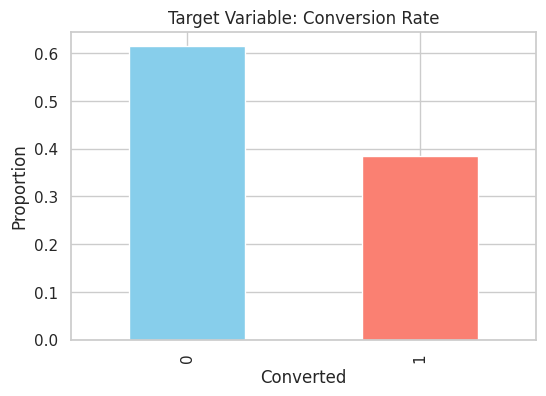

In [15]:
plt.figure(figsize=(6,4))
df['Converted'].value_counts(normalize=True).plot(kind='bar', color=['skyblue','salmon'])
plt.title('Target Variable: Conversion Rate')
plt.xlabel('Converted')
plt.ylabel('Proportion')
plt.show()

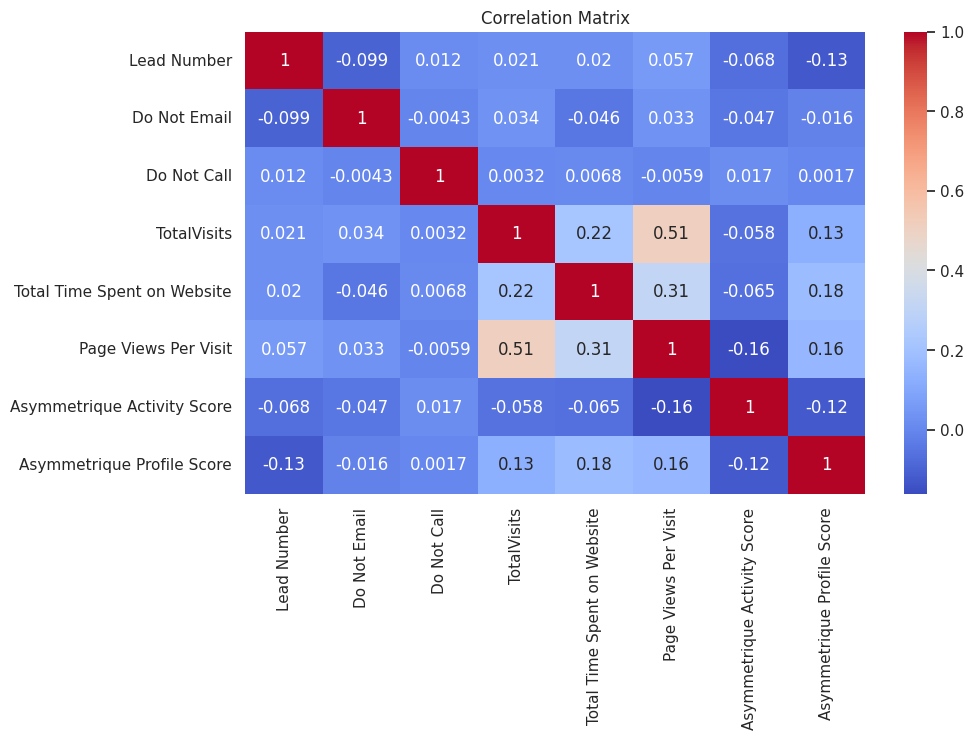

In [16]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
df['Lead Source'] = df['Lead Source'].str.lower().str.strip()
df['Lead Source'] = df['Lead Source'].str.title()

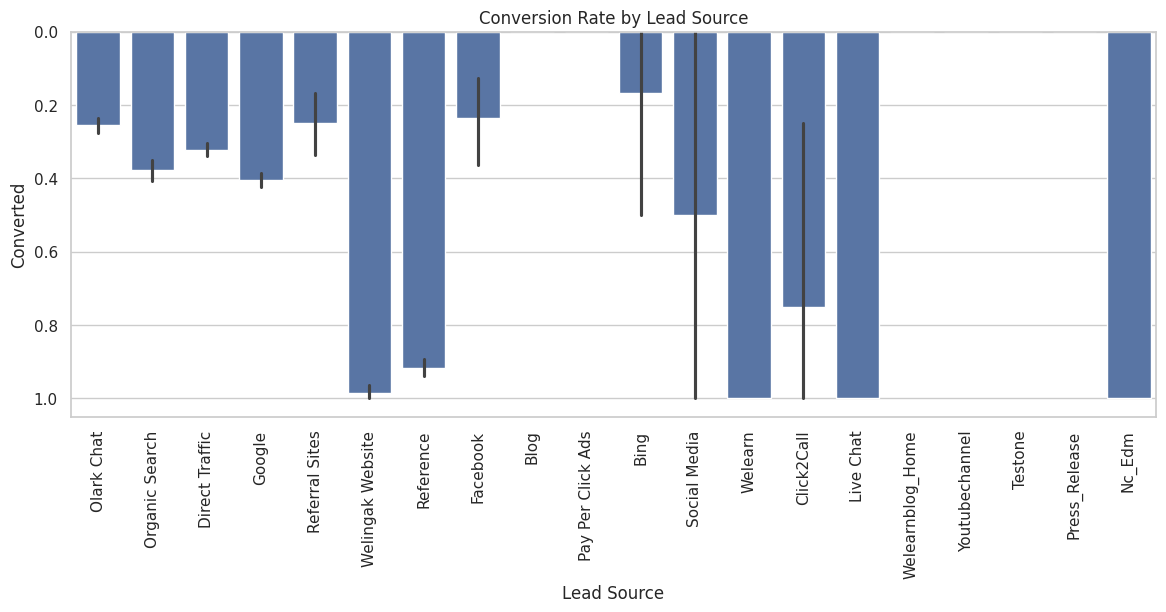

In [21]:
plt.figure(figsize=(14,5))
sns.barplot(data=df, x='Lead Source', y='Converted')
plt.title('Conversion Rate by Lead Source')
plt.xticks(rotation=90)
plt.show()

Sources like Welearn, Live Chat, Nc_Edm have higher conversion rates.

# Logistic Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [47]:
df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Source_Blog,Lead Source_Click2Call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Nc_Edm,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay Per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_Home,Lead Source_Welingak Website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kuwait,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Ringing,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Mahar

In [48]:
if 'Converted' in df.columns:
  y = df['Converted']
  X = df.drop('Converted', axis=1)
else:
  print("The 'Converted' column does not exist in the DataFrame.")

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (2530, 166)
Target (y) shape: (2530,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Select only numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=np.number).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Handle categorical features using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns between training and testing sets - crucial after one-hot encoding
# This ensures that both dataframes have the same columns in the same order.
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Ensure the order of columns is the same
X_test = X_test[train_cols]


# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [53]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [54]:
# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       279
           1       0.96      0.96      0.96       227

    accuracy                           0.96       506
   macro avg       0.96      0.96      0.96       506
weighted avg       0.96      0.96      0.96       506


Confusion Matrix:
 [[269  10]
 [ 10 217]]

AUC Score: 0.9837367565092447


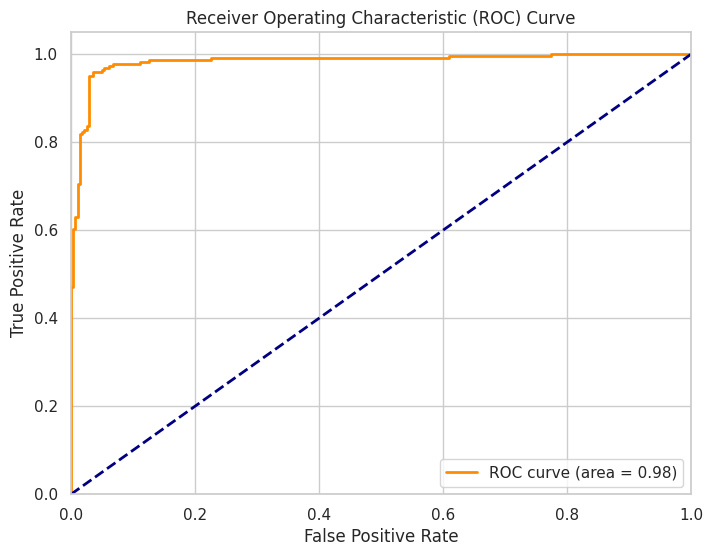

In [55]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba):0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The logistic regression model has shown exceptional performance, achieving an overall accuracy of 96%. Both precision and recall are consistently high at 96% for each class, indicating that the model is effectively identifying both converted and non-converted leads with minimal errors. The F1-score of 0.96 further confirms a strong balance between precision and recall.

The confusion matrix reveals that out of 506 predictions, only 20 were misclassified (10 false positives and 10 false negatives), while the rest were correctly predicted. This indicates strong reliability across both classes.

Additionally, the AUC score of 0.98 signifies excellent discriminative power, showing the model’s high ability to differentiate between converted and non-converted leads. Overall, the model is well-calibrated, balanced, and suitable for deployment or further enhancement. Future improvements could include adding encoded categorical features or experimenting with more advanced models like Artificial Neural Networks.

# Lead Scoring

In [56]:
lead_scores = pd.DataFrame()
lead_scores['Probability'] = y_prob
lead_scores['Score'] = (lead_scores['Probability'] * 100).round(2)

In [57]:
# Define lead category and action
def categorize_lead(score):
    if score >= 80:
        return 'Very Hot', 'Call Immediately'
    elif score >= 60:
        return 'Hot', 'Prioritize for Nurturing'
    elif score >= 40:
        return 'Warm', 'Send Follow-up Email'
    elif score >= 20:
        return 'Cold', 'Add to Long-Term Nurture List'
    else:
        return 'Very Cold', 'No Immediate Action'

In [58]:
lead_scores[['Category', 'Suggested Action']] = lead_scores['Score'].apply(
    lambda x: pd.Series(categorize_lead(x))
)

In [62]:
# Preview the lead scoring output
print(lead_scores.head(20))

    Probability  Score Category               Suggested Action
0      0.529649  52.96     Warm           Send Follow-up Email
1      0.436895  43.69     Warm           Send Follow-up Email
2      0.440545  44.05     Warm           Send Follow-up Email
3      0.218723  21.87     Cold  Add to Long-Term Nurture List
4      0.459666  45.97     Warm           Send Follow-up Email
5      0.440545  44.05     Warm           Send Follow-up Email
6      0.421599  42.16     Warm           Send Follow-up Email
7      0.440545  44.05     Warm           Send Follow-up Email
8      0.450087  45.01     Warm           Send Follow-up Email
9      0.471514  47.15     Warm           Send Follow-up Email
10     0.412208  41.22     Warm           Send Follow-up Email
11     0.431047  43.10     Warm           Send Follow-up Email
12     0.569718  56.97     Warm           Send Follow-up Email
13     0.440545  44.05     Warm           Send Follow-up Email
14     0.421599  42.16     Warm           Send Follow-u

In [76]:
hot_leads = lead_scores[lead_scores['Category'] == 'Hot']

print("\nHot Leads:\n")
hot_leads


Hot Leads:



,Probability,Score,Category,Suggested Action
20,0.609391,60.94,Hot,Prioritize for Nurturing
102,0.695812,69.58,Hot,Prioritize for Nurturing
157,0.613633,61.36,Hot,Prioritize for Nurturing
321,0.616170,61.62,Hot,Prioritize for Nurturing
